In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Численные методы решения обыкновенных дифференциальных уравнений

Точное решение

In [1]:
y = lambda x: (1 + np.exp(x**2 / 2)) / x

Производная

In [2]:
dy = lambda x: (np.exp(x**2 / 2) * (x**2 - 1) - 1) / (x**2)

Вторая производная

In [3]:
f_xyz = lambda x,y,z: ((x**2 + 1) * y + x * (x**2 - 1) * z) / (x**2)

In [4]:
# вычисление узловых точек
find_node_points = lambda a, b, h: list(np.arange(a, b+h, h))
# абсолютная погрешность решения задачи коши
acc = lambda x, ans: sum([(ans[i] - y(x[i]))**2 for i in range(len(x))])**0.5
# абсолютная погрешность первoй производной
deriv_acc = lambda x, ans: sum([(ans[i] - dy(x[i]))**2 for i in range(len(x))])**0.5
# метод Рунге-Ромберга-Ричардсона
RRR = lambda y1, y2, p: sum([(y1[i*2] - y2[i])**2 for i in range(len(x))])**0.5 / (2**p - 1)

In [7]:
a,b,h,y0,z0 = 1,2,0.1,1 + np.exp(1/2), -1

x = find_node_points(a,b,h)
x_ = find_node_points(a,b,h/2)

## Метод Эйлера

In [8]:
def euler_method(x, y0, z0, h, f = f_xyz):
    y, z = [y0], [z0]
    for k in range(len(x) - 1):
        y.append(y[k] + h*z[k])
        z.append(z[k] + h*f(x[k], y[k], z[k]))
    return y, z

In [9]:
ans, dans = euler_method(x, y0, z0, h)
print('Точное решение:')
[print('{:.3f}'.format(y(i)),end=' ') for i in x]
print('\nРешение явным методом Эйлера:')
[print('{:.3f}'.format(i),end=' ') for i in ans]
print('\nТочное значение первой производной:')
[print('{:.3f}'.format(dy(i)),end=' ') for i in x]
print('\nЗначение первой производной решения явным методом Эйлера:')
[print('{:.3f}'.format(i),end=' ') for i in dans]
# погрешности относительно точного решения
print('\nПогрешность решения:', acc(x, ans))
print('Погрешность производной:', deriv_acc(x, dans))
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
x_ = find_node_points(a,b,h/2)
ans_, dans_ = euler_method(x_, y0, z0, h/2)
print('Погрешность решения:', RRR(ans_, ans, 1))
print('Погрешность производной:', RRR(dans_, dans, 1))

Точное решение:
2.649 2.574 2.545 2.560 2.617 2.720 2.873 3.083 3.363 3.726 4.195 
Решение явным методом Эйлера:
2.649 2.549 2.502 2.500 2.541 2.624 2.751 2.927 3.158 3.454 3.828 
Точное значение первой производной:
-1.000 -0.509 -0.067 0.359 0.795 1.267 1.801 2.428 3.185 4.119 5.292 
Значение первой производной решения явным методом Эйлера:
-1.000 -0.470 -0.014 0.410 0.829 1.270 1.755 2.309 2.959 3.741 4.696 
Погрешность решения: 0.5582367523703139
Погрешность производной: 0.7574105372312112
Погрешность решения: 0.25935785742625495
Погрешность производной: 0.3321641637820709


## Метод Эйлера-Коши

In [10]:
def euler_сauchy_method(x, y0, z0, h, f = f_xyz):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        yk = y[k] + h*z[k]
        zk = z[k] + h*f(x[k], y[k], z[k])
        y.append(y[k] + h*(z[k] + zk) / 2)
        z.append(z[k] + h*(f(x[k], y[k], z[k]) + f(x[k+1], yk, zk)) / 2)
    return y, z

In [11]:
ans1, dans1 = euler_сauchy_method(x, y0, z0, h)
print('\nРешение явным методом Эйлера-Коши:')
[print('{:.3f}'.format(i),end=' ') for i in ans1]
# погрешности относительно точного решения
print('\nПогрешность решения:', acc(x, ans1))
print('Погрешность производной:', deriv_acc(x, dans1))
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
ans1_, dans1_ = euler_сauchy_method(x_, y0, z0, h/2)
print('Погрешность решения:', RRR(ans1_, ans1, 2))
print('Погрешность производной:', RRR(dans1_, dans1, 2))


Решение явным методом Эйлера-Коши:
2.649 2.575 2.548 2.563 2.620 2.723 2.875 3.085 3.362 3.723 4.186 
Погрешность решения: 0.010673398095964622
Погрешность производной: 0.015331681582464311
Погрешность решения: 0.0025520103059432776
Погрешность производной: 0.0037731392264878766


## Метод Рунге-Кутты 4-го порядка

In [12]:
def delta(xk, yk, zk, h, f):
    K1 = h * zk
    L1 = h * f(xk, yk, zk)
    K2 = h * (zk + L1 / 2)
    L2 = h * f(xk + h/2, yk + K1/2, zk + L1/2)
    K3 = h * (zk + L2 / 2)
    L3 = h * f(xk + h/2, yk + K2/2, zk + L2/2)
    K4 = h * (zk + L3)
    L4 = h * f(xk + h, yk + K3, zk + L3)
    return ((K1 + 2*K2 + 2*K3 + K4)/6, (L1 + 2*L2 + 2*L3 + L4)/6)

def runge_kutta_metod(x, y0, z0, h, f = f_xyz):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        delta_ = delta(x[k], y[k], z[k], h, f)
        y.append(y[k] + delta_[0])
        z.append(z[k] + delta_[1])
    return y, z

In [13]:
ans2, dans2 = runge_kutta_metod(x, y0, z0, h)
print('\nРешение методом Рунге-Кутты 4-го порядка:')
[print('{:.3f}'.format(i),end=' ') for i in ans2]
print('\nЗначение первой производной решения методом Рунге-Кутты:')
[print('{:.3f}'.format(i),end=' ') for i in dans2]
# погрешности относительно точного решения
print('\nПогрешность решения:', acc(x, ans2))
print('Погрешность производной:', deriv_acc(x, dans2))
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
ans2_, dans2_ =  runge_kutta_metod(x_, y0, z0, h/2)
print('Погрешность решения:', RRR(ans2_, ans2, 4))
print('Погрешность производной:', RRR(dans2_, dans2, 4))


Решение методом Рунге-Кутты 4-го порядка:
2.649 2.574 2.545 2.560 2.617 2.720 2.873 3.083 3.363 3.726 4.195 
Значение первой производной решения методом Рунге-Кутты:
-1.000 -0.509 -0.067 0.359 0.795 1.267 1.801 2.428 3.185 4.119 5.292 
Погрешность решения: 2.243362412801516e-05
Погрешность производной: 3.358057253144096e-05
Погрешность решения: 1.4035550461825057e-06
Погрешность производной: 2.1052860420152156e-06


## Метод Адамса

In [14]:
def adams_z(x, y, z, h, f, k):
    return z[k] + h*(
        55*f(x[k], y[k], z[k]) -
        59*f(x[k-1], y[k-1], z[k-1]) +
        37*f(x[k-2], y[k-2], z[k-2]) -
        9*f(x[k-3], y[k-3], z[k-3])) / 24

def adams_y(x, y, z, h, f, k):
    return y[k] + h*(55*z[k] - 59*z[k-1] + 37*z[k-2] - 9*z[k-3]) / 24

def adams_method(x, y0, z0, h, f = f_xyz):
    y, z =  runge_kutta_metod(x[:4], y0, z0, h, f)
    for k in range(3, len(x)-1):
        y.append(adams_y(x, y, z, h, f, k))
        z.append(adams_z(x, y, z, h, f, k))
    return y, z

In [15]:
ans3, dans3 = adams_method(x, y0, z0, h)
print('\nРешение методом Адамса в узлах сетки:')
[print('{:.3f}'.format(i),end=' ') for i in ans3]
print('\nЗначение первой производной решения методом Адамса:')
[print('{:.3f}'.format(i),end=' ') for i in dans3]
# погрешности относительно точного решения
print('\nПогрешность решения:', acc(x, ans3))
print('Погрешность производной:', deriv_acc(x, dans3))
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
ans3_, dans3_ = adams_method(x_, y0, z0, h/2)
print('Погрешность решения:', RRR(ans3_, ans3, 4))
print('Погрешность производной:', RRR(dans3_, dans3, 4))


Решение методом Адамса в узлах сетки:
2.649 2.574 2.545 2.560 2.618 2.720 2.872 3.082 3.361 3.723 4.189 
Значение первой производной решения методом Адамса:
-1.000 -0.509 -0.067 0.359 0.793 1.264 1.797 2.422 3.177 4.108 5.276 
Погрешность решения: 0.0065999421014504185
Погрешность производной: 0.022317754207798305
Погрешность решения: 0.0003900960620764228
Погрешность производной: 0.0013372594756700053


## График функции

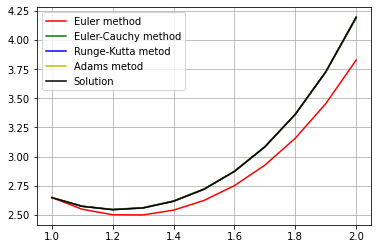

In [16]:
plt.plot(x, ans,'r', label = 'Euler method')
plt.plot(x, ans1,'g', label = 'Euler-Cauchy method')
plt.plot(x, ans2,'b', label = 'Runge-Kutta metod')
plt.plot(x, ans2,'y', label = 'Adams metod')
plt.plot(x, [y(i) for i in x],'k', label = 'Solution')
plt.grid()
plt.legend()

## График производной

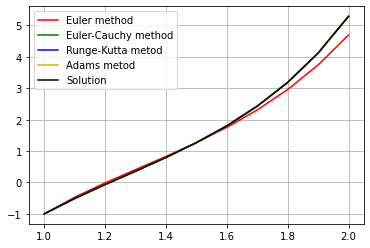

In [17]:
plt.plot(x, dans,'r', label = 'Euler method')
plt.plot(x, dans1,'g', label = 'Euler-Cauchy method')
plt.plot(x, dans2,'b', label = 'Runge-Kutta metod')
plt.plot(x, dans2,'y', label = 'Adams metod')
plt.plot(x, [dy(i) for i in x],'k', label = 'Solution')
plt.grid()
plt.legend()

## Логарифмическая ошибка

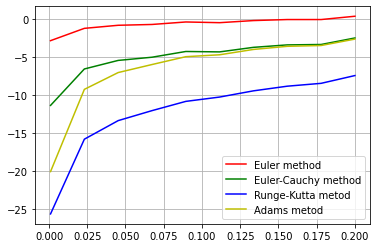

In [18]:
def acc_h(y0, z0, h, a, b, met):
    xi = find_node_points(a, b, h)
    y = met(xi, y0, z0, h)[0]
    return acc(xi, y)

hh = np.linspace(0.001,0.2,10)
y1 = list(map(lambda v: np.log(acc_h(y0, z0, v, a, b, euler_method)), hh))
y2 = list(map(lambda v: np.log(acc_h(y0, z0, v, a, b, euler_сauchy_method)), hh))
y3 = list(map(lambda v: np.log(acc_h(y0, z0, v, a, b, runge_kutta_metod)), hh))
y4 = list(map(lambda v: np.log(acc_h(y0, z0, v, a, b, adams_method)), hh))
plt.plot(hh, y1,'r', label = 'Euler method')
plt.plot(hh, y2,'g', label = 'Euler-Cauchy method')
plt.plot(hh, y3,'b', label = 'Runge-Kutta metod')
plt.plot(hh, y4,'y', label = 'Adams metod')
plt.grid()
plt.legend()